In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
cv2.__version__

'4.7.0'

In [4]:
# !git clone https://github.com/matzim95/ML-datasets

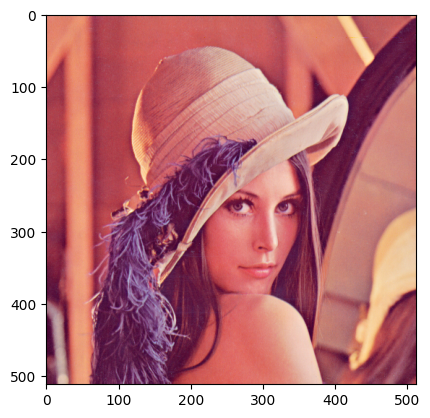

In [5]:
img = cv2.imread('ML-datasets/images/lena.png')
cv2_imshow(img)

In [6]:
import numpy as np

def apply_filter(source, kernel):
    new_image = cv2.filter2D(source, -1, kernel)
#     cv2_imshow(new_image)
    return new_image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bottom_sobel = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
left_sobel = np.array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])
result_1 = apply_filter(gray, bottom_sobel)
result_2 = apply_filter(gray, left_sobel)

sobel = result_1 + result_2

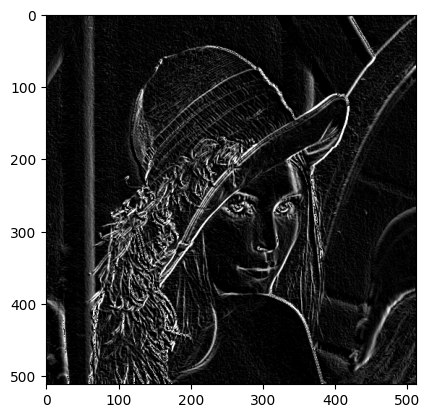

In [8]:
cv2_imshow(sobel)

# Operacje morfologiczne

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

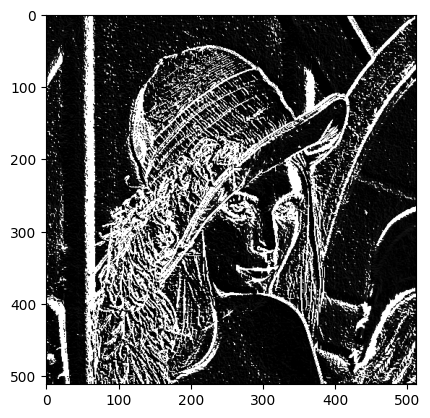

In [11]:
#using sobel output from above
sobel[sobel>30] = 255
cv2_imshow(sobel)

In [12]:
def morphological_operation(image):

  def opening(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  
  def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  @interact(operation=['Erosion','Dilation', 'Opening', 'Closing'], 
            struct_el=['MORPH_RECT','MORPH_ELLIPSE', 'MORPH_CROSS'], 
            size = widgets.IntSlider(min=3, max=15, step=2, value=5))
  def trackbar(operation, struct_el, size):
    operation_dict = {'Erosion': cv2.erode,'Dilation': cv2.dilate,
                      'Opening': opening, 'Closing': closing}
    struct_el_dict = {'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT,(size, size)),
                      'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
                      'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))}
    result = operation_dict[operation](image, struct_el_dict[struct_el])
    cv2_imshow(result)


morphological_operation(sobel)


interactive(children=(Dropdown(description='operation', options=('Erosion', 'Dilation', 'Opening', 'Closing'),…